In [1]:
! pip -q install ultralytics roboflow

In [2]:
!pip  -q install  roboflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.2.3 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.


In [3]:

from roboflow import Roboflow
rf = Roboflow(api_key="FKJ9mHn9S7bp28fO6EvC")
project = rf.workspace("duanshuo").project("tomato-and-strawberry")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.63, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to tomato-and-strawberry-3 in yolov8:: 100%|██████████| 15264/15264 [00:02<00:00, 6952.90it/s]


In [4]:
import yaml

# Define the path to the data.yaml file
yaml_file_path = '/kaggle/working/tomato-and-strawberry-3/data.yaml'

# Define the new content
new_content = {
    "names": [
        "Bacterial Spot",
        "Early Blight",
        "Healthy",
        "Late Blight",
        "Leaf Mold",
        "Septoria",
        "Spider Mites",
        "Yellow Leaf Curl Virus"
    ],
    "nc": 8,
    "roboflow": {
        "license": "CC BY 4.0",
        "project": "tomato-and-strawberry",
        "url": "https://universe.roboflow.com/duanshuo/tomato-and-strawberry/dataset/3",
        "version": 3,
        "workspace": "duanshuo"
    },
    "test": "/kaggle/working/tomato-and-strawberry-3/test",
    "train": "/kaggle/working/tomato-and-strawberry-3/train",
    "val": "/kaggle/working/tomato-and-strawberry-3/valid"
}

# Write the new content to the data.yaml file
with open(yaml_file_path, 'w') as yaml_file:
    yaml.dump(new_content, yaml_file, default_flow_style=False)

print(f"{yaml_file_path} has been updated.")


/kaggle/working/tomato-and-strawberry-3/data.yaml has been updated.


Checking annotations path: /kaggle/working/tomato-and-strawberry-3/train/labels


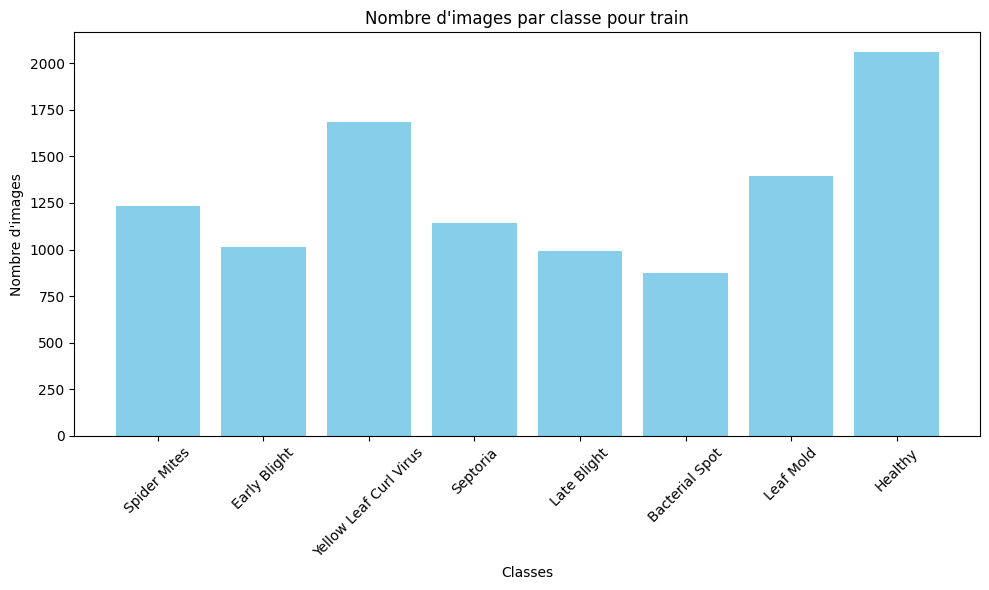

Checking annotations path: /kaggle/working/tomato-and-strawberry-3/valid/labels


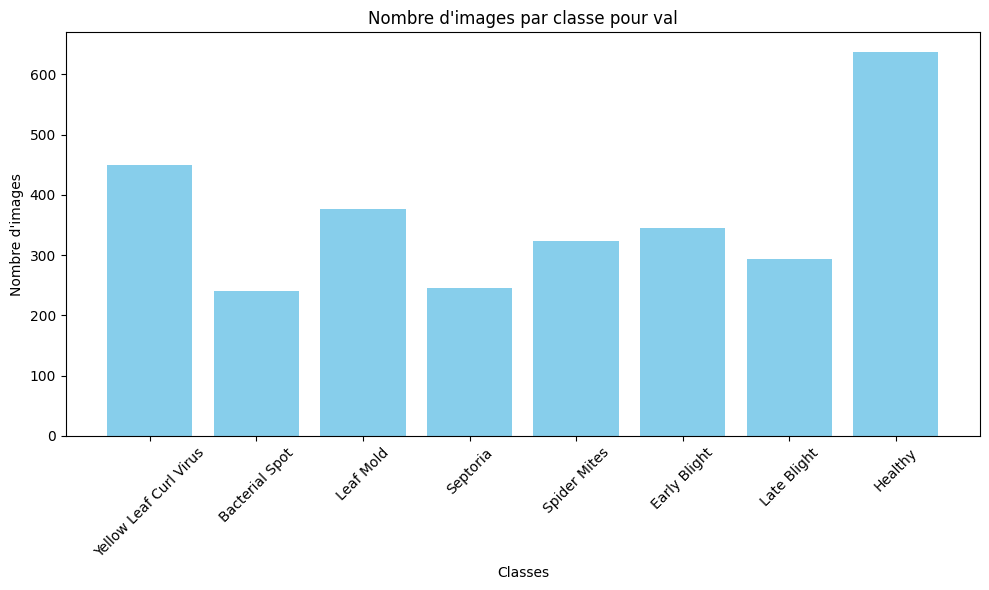

Checking annotations path: /kaggle/working/tomato-and-strawberry-3/test/labels


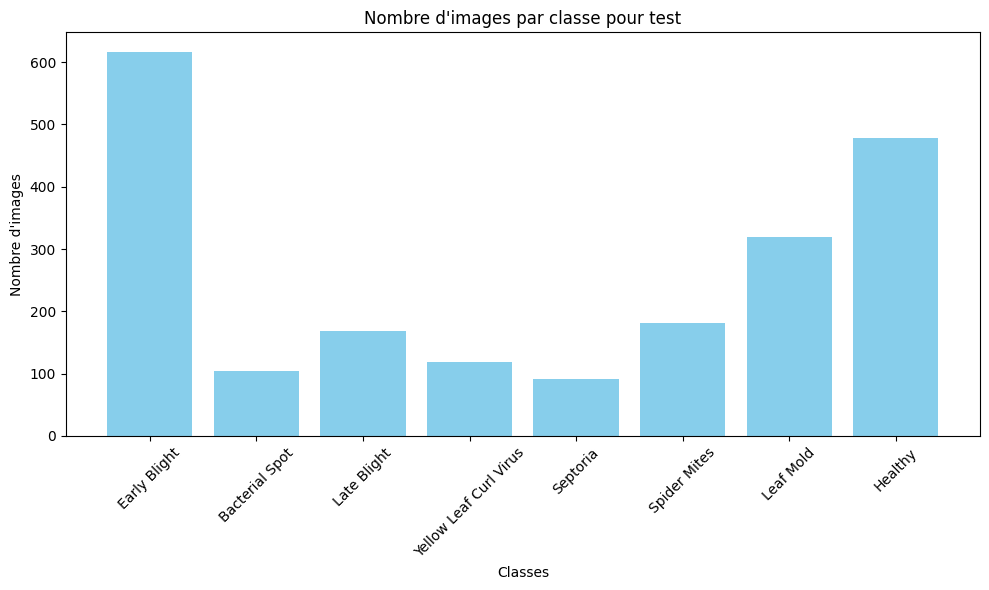

In [5]:
import os
import yaml
import matplotlib.pyplot as plt
from collections import defaultdict

# Lire le fichier data.yaml
yaml_path = '/kaggle/working/tomato-and-strawberry-3/data.yaml'
with open(yaml_path, 'r') as file:
    data = yaml.safe_load(file)

# Dictionnaire pour stocker les chemins de chaque set de données
sets = {
    'train': '/kaggle/working/tomato-and-strawberry-3/train/labels',
    'val': '/kaggle/working/tomato-and-strawberry-3/valid/labels',
    'test': '/kaggle/working/tomato-and-strawberry-3/test/labels'
}

# Lire les noms des classes à partir de data.yaml
class_names = data['names']

# Fonction pour parcourir et compter les classes dans un set de données
def count_classes_in_set(path):
    class_counts = defaultdict(int)
    annotations_path = path  # Utiliser directement le chemin donné
    print(f"Checking annotations path: {annotations_path}")
    if not os.path.exists(annotations_path):
        print(f"Path does not exist: {annotations_path}")
        return class_counts
    for annotation_file in os.listdir(annotations_path):
        if annotation_file.endswith(".txt"):  # Assurez-vous de lire uniquement les fichiers texte
            with open(os.path.join(annotations_path, annotation_file), 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_id = int(line.split()[0])  # Le class_id est le premier élément de chaque ligne
                    class_counts[class_id] += 1
    return class_counts

# Fonction pour créer un graphique
def plot_class_distribution(class_counts, set_name):
    class_labels = [class_names[class_id] for class_id in class_counts.keys()]
    class_values = [count for count in class_counts.values()]

    plt.figure(figsize=(10, 6))
    plt.bar(class_labels, class_values, color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Nombre d\'images')
    plt.title(f'Nombre d\'images par classe pour {set_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Compter les classes et créer des graphiques pour chaque set de données
for set_name, set_path in sets.items():
    class_counts = count_classes_in_set(set_path)
    plot_class_distribution(class_counts, set_name)


In [6]:
from roboflow import Roboflow
from ultralytics import YOLO

In [7]:
model = YOLO("yolov8s.pt")


100%|██████████| 21.5M/21.5M [00:07<00:00, 2.99MB/s]


In [8]:
results = model.train(data="/kaggle/working/tomato-and-strawberry-3/data.yaml", translate=0, scale=0.1, erasing=0.1,epochs=50, imgsz=640,batch=16)


Ultralytics YOLOv8.2.63 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/tomato-and-strawberry-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 755k/755k [00:06<00:00, 116kB/s] 
2024-07-23 12:13:35,495	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-23 12:13:36,745	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.25M/6.25M [00:00<00:00, 93.0MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/tomato-and-strawberry-3/train/labels... 5340 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5340/5340 [00:03<00:00, 1393.86it/s]


train: New cache created: /kaggle/working/tomato-and-strawberry-3/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 11, len(boxes) = 10394. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/working/tomato-and-strawberry-3/valid/labels... 1524 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1524/1524 [00:01<00:00, 1318.97it/s]


val: New cache created: /kaggle/working/tomato-and-strawberry-3/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.28G      1.028      2.296       1.51         42        640: 100%|██████████| 334/334 [01:24<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:14<00:00,  3.40it/s]

                   all       1524       2910      0.633      0.459      0.444      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.23G     0.9995      1.555      1.459         33        640: 100%|██████████| 334/334 [01:20<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.76it/s]

                   all       1524       2910      0.734      0.449      0.531      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.18G      1.003      1.468      1.468         37        640: 100%|██████████| 334/334 [01:20<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.73it/s]

                   all       1524       2910      0.589      0.515      0.567      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.54G     0.9703      1.391      1.432         43        640: 100%|██████████| 334/334 [01:20<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:13<00:00,  3.69it/s]

                   all       1524       2910      0.656      0.506      0.586      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.35G     0.9409       1.29      1.419         34        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.78it/s]


                   all       1524       2910      0.772      0.539      0.637      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       4.3G     0.9148      1.233      1.394         51        640: 100%|██████████| 334/334 [01:21<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:13<00:00,  3.64it/s]

                   all       1524       2910      0.777      0.556      0.675       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.16G     0.8993      1.166      1.377         32        640: 100%|██████████| 334/334 [01:21<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:13<00:00,  3.66it/s]


                   all       1524       2910      0.734      0.527      0.639      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.46G      0.866      1.104      1.355         58        640: 100%|██████████| 334/334 [01:21<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.74it/s]


                   all       1524       2910      0.818      0.547      0.685      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.18G     0.8716      1.072      1.356         60        640: 100%|██████████| 334/334 [01:21<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:13<00:00,  3.69it/s]

                   all       1524       2910      0.828      0.563       0.69      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.32G     0.8453      1.047      1.333         42        640: 100%|██████████| 334/334 [01:20<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:13<00:00,  3.69it/s]


                   all       1524       2910      0.798      0.601      0.716      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.33G     0.8121     0.9723       1.32         35        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.77it/s]


                   all       1524       2910      0.785      0.601      0.712      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.34G     0.8143     0.9677      1.316         28        640: 100%|██████████| 334/334 [01:21<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.72it/s]

                   all       1524       2910      0.811      0.596      0.717      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       4.3G     0.7945     0.9531      1.302         35        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.77it/s]


                   all       1524       2910       0.79      0.616      0.724      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.21G     0.7902     0.9297      1.302         28        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.72it/s]


                   all       1524       2910      0.753       0.65      0.737      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.51G      0.793     0.9397      1.297         52        640:  90%|█████████ | 301/334 [01:13<00:07,  4.16it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

      21/50      4.37G     0.7461      0.832      1.268         42        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:13<00:00,  3.65it/s]


                   all       1524       2910      0.801      0.665      0.765      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.28G      0.732     0.8013      1.259         39        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.76it/s]


                   all       1524       2910      0.796      0.661      0.758      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.42G     0.7574     0.8223      1.267         86        640: 100%|██████████| 334/334 [01:21<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.77it/s]


                   all       1524       2910      0.802      0.644      0.748      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.13G     0.7499     0.8035      1.261         49        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.80it/s]


                   all       1524       2910      0.847      0.649      0.769      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.36G      0.736      0.779      1.254         41        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.76it/s]


                   all       1524       2910      0.795      0.687      0.769      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.58G     0.7268     0.7616      1.248         46        640: 100%|██████████| 334/334 [01:20<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.79it/s]


                   all       1524       2910      0.833      0.667      0.774      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.15G      0.717     0.7631      1.239         41        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.75it/s]


                   all       1524       2910      0.821      0.668      0.775      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.31G     0.7186     0.7503      1.236         30        640: 100%|██████████| 334/334 [01:21<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.78it/s]


                   all       1524       2910       0.82       0.69      0.779      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.16G     0.7084     0.7286      1.237         54        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.78it/s]


                   all       1524       2910      0.843      0.679      0.783      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.33G     0.7121     0.7218      1.237         33        640: 100%|██████████| 334/334 [01:21<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.79it/s]


                   all       1524       2910       0.81      0.686       0.78      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.15G      0.697     0.6972      1.222         37        640: 100%|██████████| 334/334 [01:21<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.74it/s]


                   all       1524       2910      0.806       0.68      0.775      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.49G      0.695     0.6881      1.224         49        640: 100%|██████████| 334/334 [01:21<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.74it/s]


                   all       1524       2910      0.828        0.7       0.79      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.36G     0.6922     0.6846      1.223         40        640: 100%|██████████| 334/334 [01:21<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.74it/s]


                   all       1524       2910      0.831      0.681      0.784      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       4.3G     0.6849     0.6716      1.215         59        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.74it/s]


                   all       1524       2910       0.82      0.704      0.789      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.15G     0.6851     0.6666      1.219         61        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.79it/s]


                   all       1524       2910      0.811      0.716       0.79      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.47G     0.6567     0.6341      1.201         36        640: 100%|██████████| 334/334 [01:21<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.79it/s]


                   all       1524       2910      0.839      0.696      0.791      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.56G     0.6827     0.6509      1.214         29        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.77it/s]


                   all       1524       2910      0.823      0.698       0.79      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.31G     0.6551     0.6133      1.195         32        640: 100%|██████████| 334/334 [01:21<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.85it/s]


                   all       1524       2910      0.812      0.722      0.794      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.38G     0.6626     0.6207      1.199         43        640: 100%|██████████| 334/334 [01:21<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.80it/s]

                   all       1524       2910      0.834      0.704      0.795      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       4.3G     0.6553     0.6034      1.195         53        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.84it/s]


                   all       1524       2910      0.845      0.698      0.793       0.69
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.36G     0.5263     0.4909      1.049         31        640: 100%|██████████| 334/334 [01:21<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.82it/s]


                   all       1524       2910      0.819      0.709      0.793      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       4.5G     0.5084     0.4544      1.033         20        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.85it/s]

                   all       1524       2910      0.831      0.714      0.795      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.43G     0.4894       0.43      1.012         39        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.86it/s]


                   all       1524       2910      0.845      0.689      0.788      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       4.5G     0.4815     0.4092      1.008         16        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.86it/s]


                   all       1524       2910      0.822      0.712      0.788       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.53G     0.4756     0.3999      1.001         19        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.82it/s]


                   all       1524       2910       0.82      0.714      0.793      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       4.5G     0.4653     0.3903     0.9874         18        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.85it/s]


                   all       1524       2910      0.853      0.685      0.787      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.59G     0.4527      0.373     0.9833         18        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.87it/s]

                   all       1524       2910       0.84      0.701      0.792      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.36G     0.4495     0.3617     0.9768         20        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.84it/s]


                   all       1524       2910      0.834      0.704      0.793      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       4.6G     0.4343     0.3561     0.9698         23        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.86it/s]

                   all       1524       2910      0.836      0.701       0.79      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       4.7G     0.4346     0.3486     0.9685         24        640: 100%|██████████| 334/334 [01:20<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.84it/s]


                   all       1524       2910      0.844      0.697      0.791      0.694

50 epochs completed in 1.321 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.63 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:17<00:00,  2.80it/s]


                   all       1524       2910      0.819      0.714      0.793      0.695
        Bacterial Spot        207        240        0.9      0.838      0.892      0.824
          Early Blight        245        346      0.802      0.708      0.819      0.718
               Healthy         58        638      0.572      0.138      0.192      0.121
           Late Blight        249        293      0.925      0.878      0.948      0.873
             Leaf Mold        206        376      0.832      0.777      0.863      0.741
              Septoria        198        245      0.848      0.812      0.897      0.844
          Spider Mites        190        323      0.882      0.793      0.873      0.771
Yellow Leaf Curl Virus        193        449      0.795      0.771      0.856      0.668
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▃▃▄▆▅▆▆▇▆▆▇▇▇▇▇▇▇▇▇████████████████████
metrics/mAP50-95(B),▁▂▃▃▅▄▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇█████████████████
metrics/precision(B),▂▅▁▃▆▅▇▇▇▆▇▆▇▇█▆▇▆▇█▇▇▇█▇▇▇▇█▇▇█▇▇█▇███▇
metrics/recall(B),▁▁▃▂▄▃▄▄▅▅▅▅▆▅▅▆▇▆▆▆▇▇▇▇▇▇▇█▇▇████▇█▇▇██
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,███▇▇▆▆▆▆▅▅▅▅▅▅▅▅▅▅▅▄▄▄▄▄▄▄▄▄▄▄▄▂▂▂▂▁▁▁▁



0: 448x640 3 Healthys, 1 Late Blight, 1 Leaf Mold, 100.7ms
Speed: 3.6ms preprocess, 100.7ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


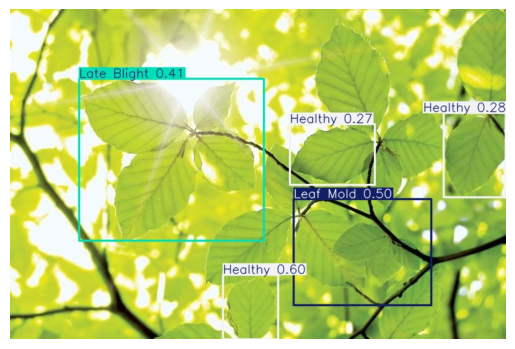

In [9]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image

# Load a model
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")  # pretrained YOLOv8n model

# Run batched inference on a list of images
results = model(["https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTqBWNZujE-QQN7vGunfs7VmoxCNWeTgrYq5A&s"])  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs

    # Save the result to a file
    result.save("result.jpg")  # Specify filename directly

    # Load and display the saved image
    img = Image.open("result.jpg")
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [10]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

# Export the model to TFLite format
model.export(format="tflite")  # creates 'yolov8n_float32.tflite'




Ultralytics YOLOv8.2.63 🚀 Python-3.10.13 torch-2.1.2 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs

PyTorch: starting from '/kaggle/working/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 12, 8400) (21.5 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx2tf>1.17.5,<=1.22.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 221.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 46.6 MB/s eta 0:00:

100%|██████████| 1.11M/1.11M [00:00<00:00, 24.9MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /kaggle/working/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 52.32file/s]


ONNX: starting export with onnx 1.16.1 opset 17...


ONNX: slimming with onnxslim 0.1.32...
ONNX: export success ✅ 2.1s, saved as '/kaggle/working/runs/detect/train/weights/best.onnx' (42.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...


Summary on the non-converted ops:
---------------------------------
 * Accepted dialects: tfl, builtin, func
 * Non-Converted Ops: 155, Total Ops 410, % non-converted = 37.80 %
 * 155 ARITH ops

- arith.constant:  155 occurrences  (f32: 131, i32: 24)



  (f32: 8)
  (f32: 18)
  (f32: 64)
  (f32: 58)
  (f32: 3)
  (f32: 59)
  (f32: 7)
  (f32: 6)
  (f32: 2)
  (f32: 1)
  (f32: 20)
  (f32: 2)
  (f32: 4)
Summary on the non-converted ops:
---------------------------------
 * Accepted dialects: tfl, builtin, func
 * Non-Converted Ops: 155, Total Ops 541, % non-converted = 28.65 %
 * 155 ARITH ops

- arith.constant:  155 occurrences  (f16: 131, i32: 24)



  (f32: 8)
  (f32: 18)
  (f32: 64)
  (f32: 131)
  (f32: 58)
  (f32: 3)
  (f32: 59)
  (f32: 7)
  (f32: 6)
  (f32: 2)
  (f32: 1)
  (f32: 20)
  (f32: 2)
  (f32: 4)


TensorFlow SavedModel: export success ✅ 65.1s, saved as '/kaggle/working/runs/detect/train/weights/best_saved_model' (106.9 MB)

TensorFlow Lite: starting export with tensorflow 2.15.0...
TensorFlow Lite: export success ✅ 0.0s, saved as '/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite' (42.7 MB)

Export complete (67.3s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640 data=/kaggle/working/tomato-and-strawberry-3/data.yaml  
Visualize:       https://netron.app


'/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite'